In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
reserve_price = np.arange(0,101) + 0.0

In [4]:
reserve_price /= np.sum(reserve_price)

In [7]:
strats0 = []
strats1 = []
for i in range(0,101):
    for j in range(i+1,101):
        strats0.append(i)
        strats1.append(j)
strats0 = np.array(strats0)
strats1 = np.array(strats1)
p_strats = np.array([1]*len(strats1))/len(strats1)

In [8]:
p_strats

array([0.00019802, 0.00019802, 0.00019802, ..., 0.00019802, 0.00019802,
       0.00019802])

In [164]:
# Assuming everyone is rational
for n_iter in range(500):
    reward = np.zeros(len(strats))

    # reward on the first bid
    for i in range(1,101):
        reward += (100 - strats0)*(0.0+ (strats0 >= i))*reserve_price[i]

    for i in range(1,101):
        residual_prob = (strats0 < i)*p_strats
        if np.sum(residual_prob) >0 :
            residual_prob /= np.sum(residual_prob)
        average = np.inner(residual_prob, strats1)
        bid_hit_prob = np.nan_to_num(((100-average)/(100-strats1)),1)*(0.0 + (strats1 <=average)) + (0.0 + (strats1 >average)) 
        reward += bid_hit_prob*(100-strats1)* reserve_price[i] 

    scaler = np.exp(reward*1e-1)
    sum_norm = np.inner(p_strats, scaler)
    p_strats = (p_strats*scaler)/sum_norm

/tmp/ipykernel_10291/2054007292.py:13: RuntimeWarning: divide by zero encountered in divide
  bid_hit_prob = np.nan_to_num(((100-average)/(100-strats1)),1)*(0.0 + (strats1 <=average)) + (0.0 + (strats1 >average))


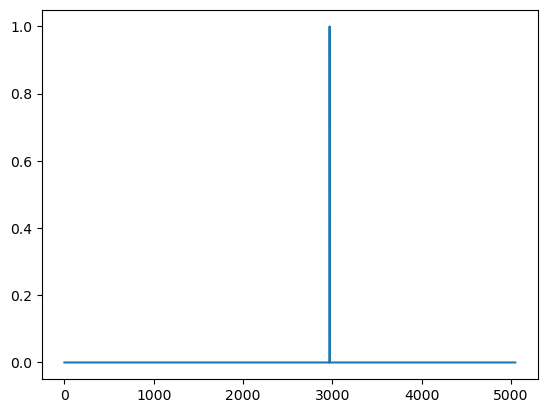

In [165]:
plt.plot(p_strats)

In [9]:
# Assuming that 1/3 person is rational, 1/3 is anchor biased, 1/3 is random guys

reward = np.zeros(len(strats0))

# reward on the first bid
for i in range(1,101):
    reward += (100 - strats0)*(0.0+ (strats0 >= i))*reserve_price[i]

for i in range(1,101):
    average = i/3.0 + (100-i)/3.0 + 67/3.0
    bid_hit_prob = np.nan_to_num(((100-average)/(100-strats1)),1)*(0.0 + (strats1 <=average)) + (0.0 + (strats1 >average)) 
    reward += bid_hit_prob*(100-strats1)* reserve_price[i] 


/tmp/ipykernel_28910/3019788704.py:11: RuntimeWarning: divide by zero encountered in divide
  bid_hit_prob = np.nan_to_num(((100-average)/(100-strats1)),1)*(0.0 + (strats1 <=average)) + (0.0 + (strats1 >average))


In [14]:
strats1[np.argmax(reward)]

55

In [9]:
strat = strat_1 + strat_2 + strat_3
reward = 1000*np.concatenate([reward_1, reward_2, reward_3])

In [21]:
for i in range(276):
    print(list(map(lambda x:((x//5 + 26),(1 +x % 5)), strat[idx_argsort[i]])), reward[idx_argsort[i]], p_strat[idx_argsort[i]])

[(27, 3), (28, 2)] 82.5000000000019 0.01166689566146115
[(27, 3), (28, 4)] 82.5000000000019 0.011173853687209925
[(28, 2), (28, 4)] 82.5000000000019 0.010717647952519883
[(27, 3), (27, 4)] 82.5000000000019 0.010684305131720405
[(27, 2), (27, 3)] 82.5000000000019 0.01044081790433436
[(27, 4), (28, 2)] 82.50000000000192 0.010248086669521705
[(27, 2), (28, 2)] 82.50000000000192 0.010014540530731074
[(26, 3), (27, 3)] 82.5000000000019 0.009996615831001827
[(27, 3), (29, 2)] 82.5000000000019 0.009956372979939376
[(27, 4), (28, 4)] 82.5000000000019 0.00981500343723316
[(27, 3), (29, 4)] 82.5000000000019 0.00971539791402059
[(27, 3), (28, 3)] 82.50000000000193 0.009595218503680641
[(27, 2), (28, 4)] 82.5000000000019 0.009591326937521365
[(26, 3), (28, 2)] 82.5000000000019 0.009588474325192274
[(28, 2), (29, 2)] 82.5000000000019 0.009549874507942936
[(28, 2), (29, 4)] 82.5000000000019 0.00931873796417317
[(27, 1), (27, 3)] 82.50000000000189 0.009275734696711958
[(26, 4), (27, 3)] 82.5000000000

In [23]:
samples = np.random.choice(276,p=p_strat[idx_argsort[:276]],size=5)

In [24]:
for i in idx_argsort[:276][samples]:
    print(list(map(lambda x:((x//5 + 26),chr(ord('G') +x % 5)), strat[idx_argsort[i]])))

[(26, 'H'), (27, 'G')]
[(26, 'K'), (27, 'K')]
[(26, 'K'), (28, 'G')]
[(26, 'G'), (28, 'I')]
[(28, 'I'), (30, 'I')]


In [20]:
samples

array([886, 150,   6, 194,  66])